In [1]:
import numpy as np
import torchvision
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#download cifar10 dataset
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,  download=True)

# np.load('data/3d_sin_5_5_bounds.npy')

## CIFAR10 VISUALISATION

In [5]:
data = np.load('data/CIFAR10/CIFAR10_train.npy')
labels = np.load('data/CIFAR10/CIFAR10_train_labels.npy')

In [12]:
# for i in range(10):
#     data_lbl = data[labels == i]
#     print("label : ", i, "shape : ", data_lbl.shape)
#     for j in range(5):
#         r = np.random.randint(0, data_lbl.shape[0])
#         plt.subplot(1, 5, j+1)
#         plt.imshow(data_lbl[r])
#         plt.show()

## Conv2D


Conv2D expects an input of shape (N,Cin,H,W)   ====>    (N,Cout,Hout,Wout)
Kindof like it applies K Kernel filter's to each channel of input.... to give K*cin = cout layers of output.
for each of the N datapoints.


Hout = floor( (H + 2*P - K)/ S  ) + 1

In [21]:
l = nn.Conv2d(3,3*64, 3,padding=1)
X = torch.zeros(1,3,5,5)

l(X).shape

torch.Size([1, 192, 5, 5])


## Loading Model, Sampling

In [15]:
import os
import argparse
import torch
import numpy as np
from myModels import LitDiffusionModel
import matplotlib.pyplot as plt

In [3]:
litmodel = LitDiffusionModel.load_from_checkpoint(
    './runs/n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100/last.ckpt',
    hparams_path = './runs/n_steps=50,lbeta=1.000e-05,ubeta=1.280e-02,batch_size=512,n_epochs=100/lightning_logs/version_0/hparams.yaml'
)
litmodel.eval()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


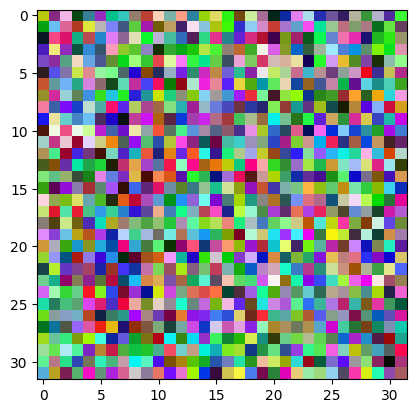

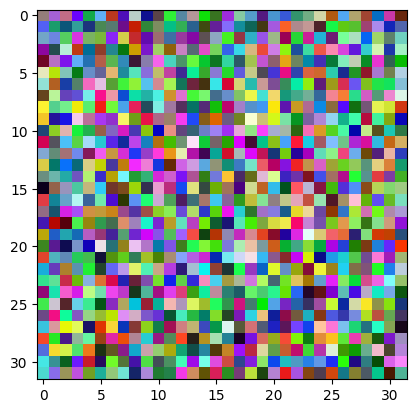

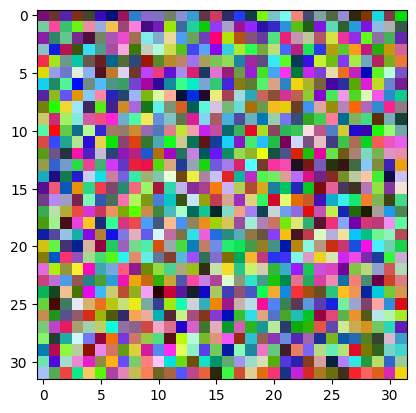

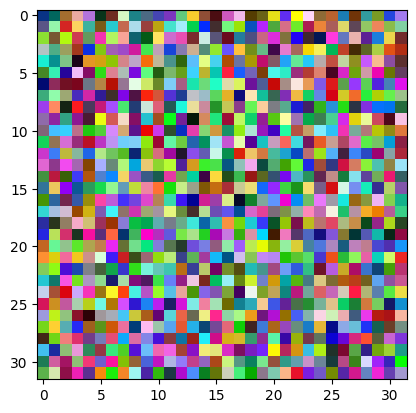

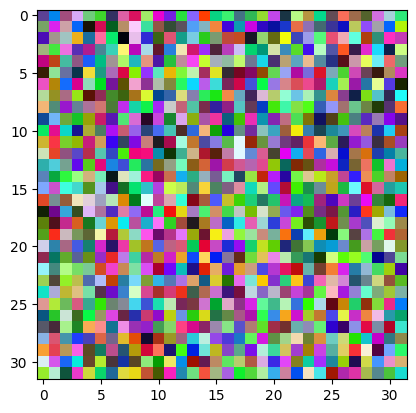

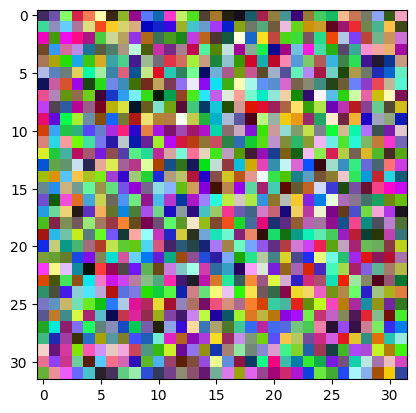

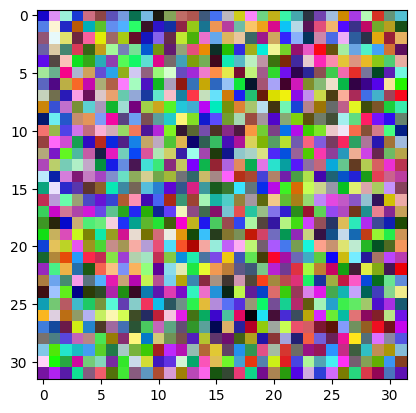

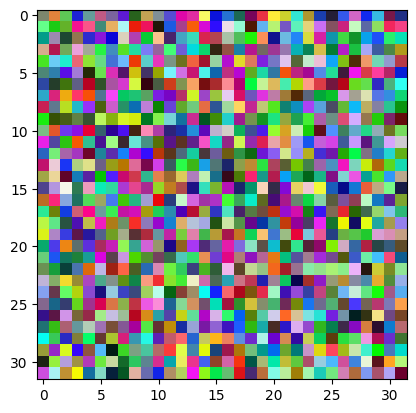

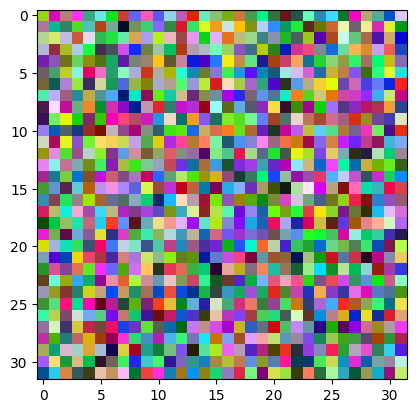

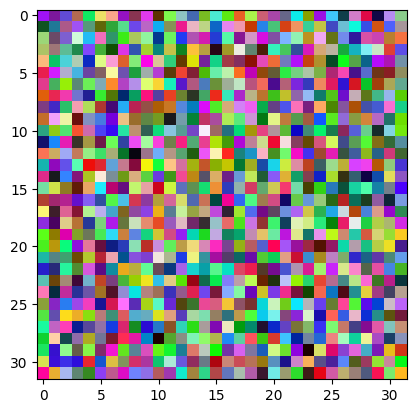

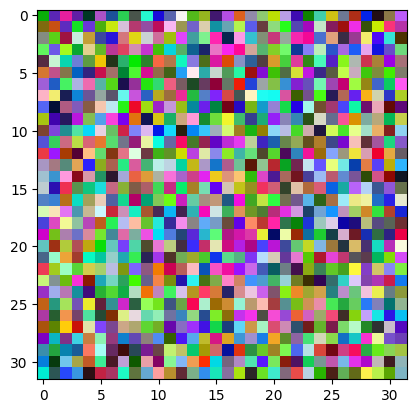

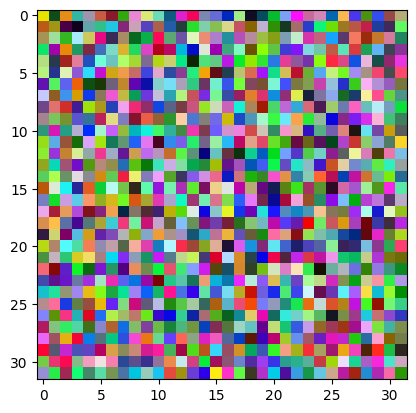

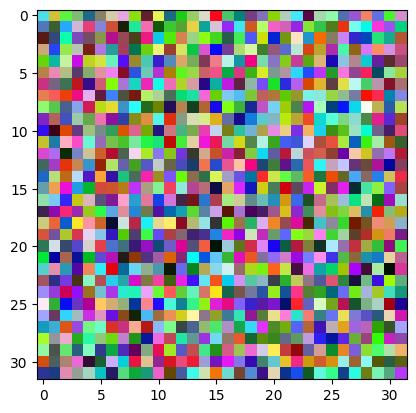

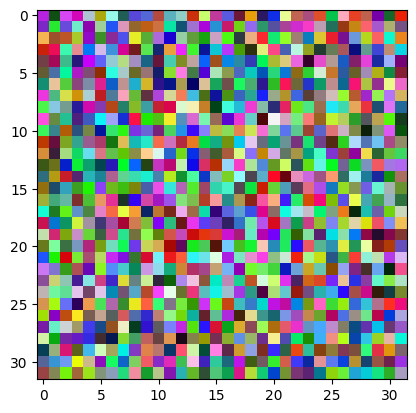

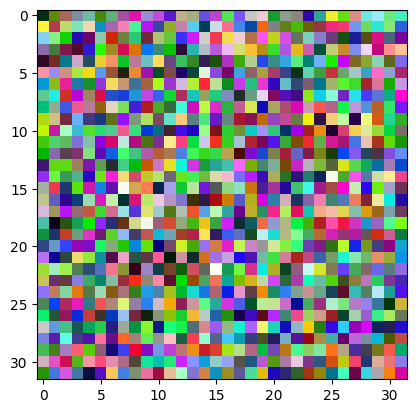

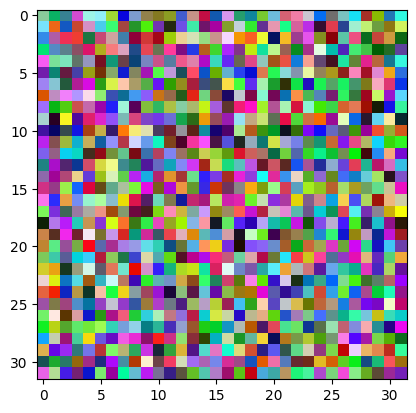

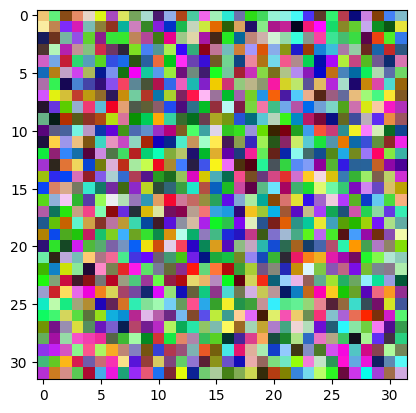

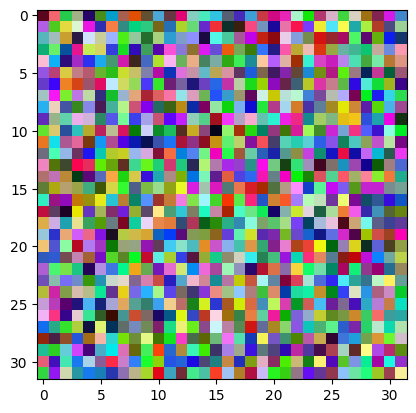

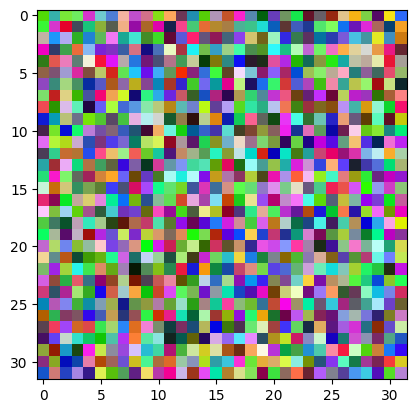

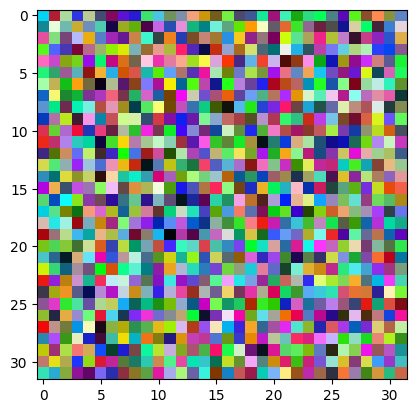

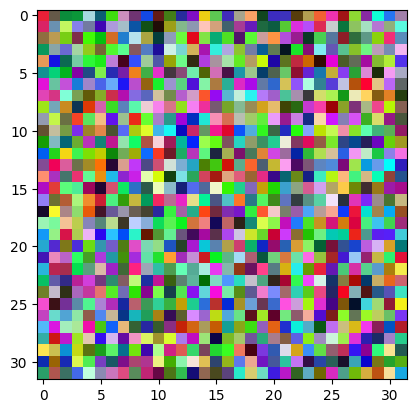

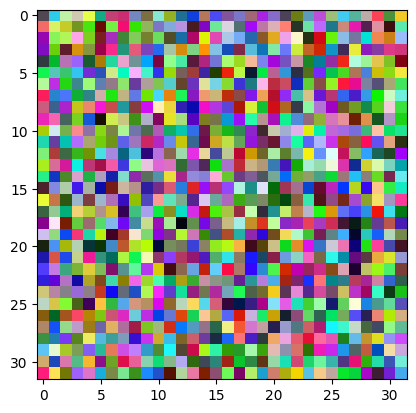

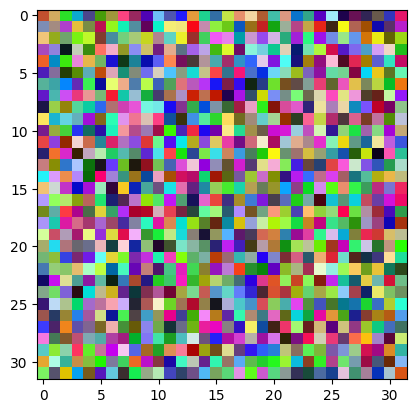

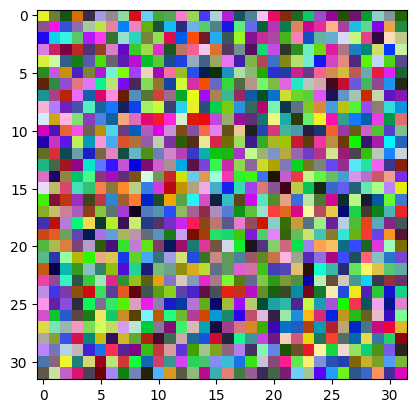

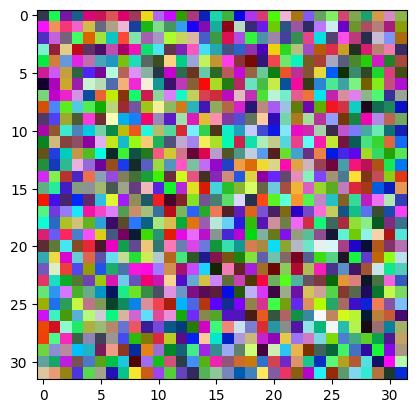

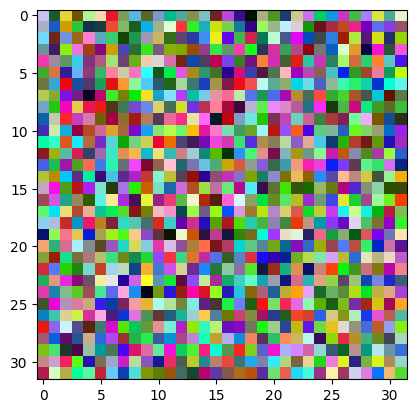

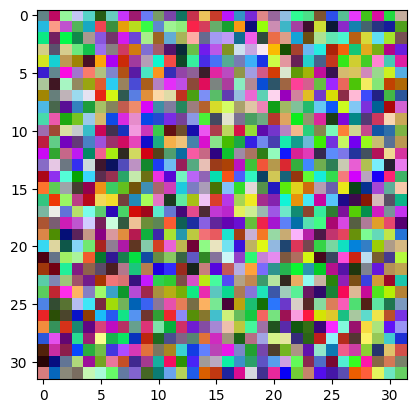

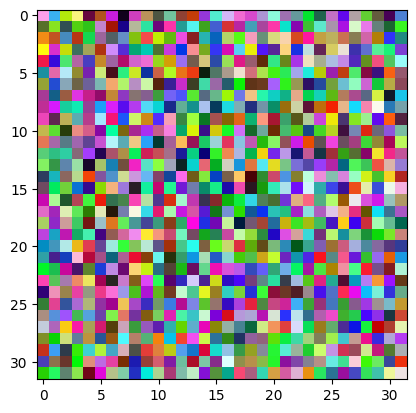

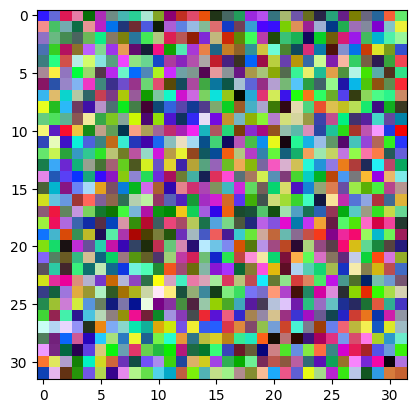

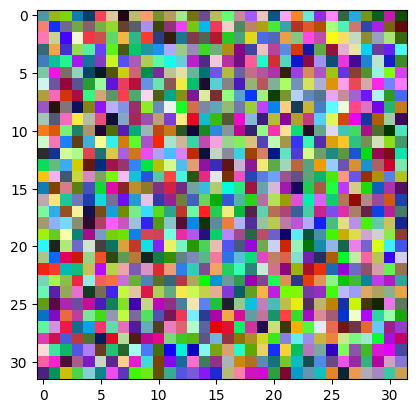

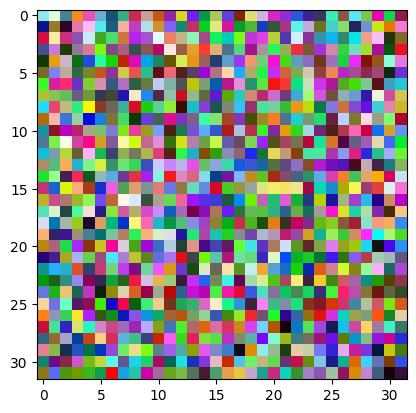

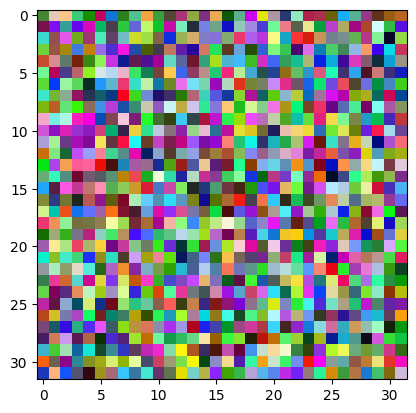

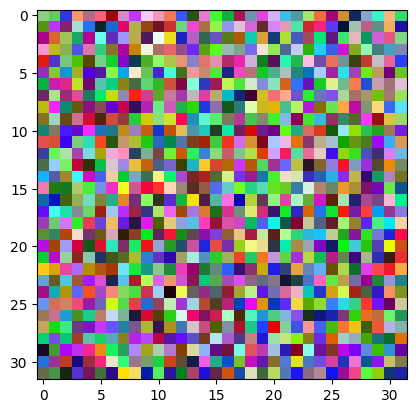

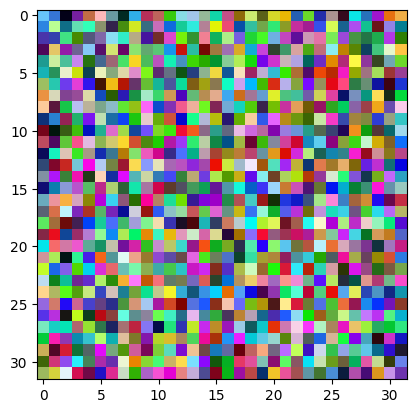

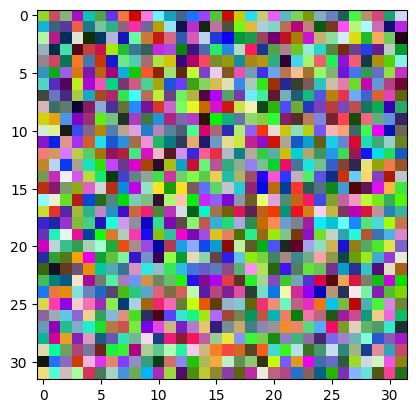

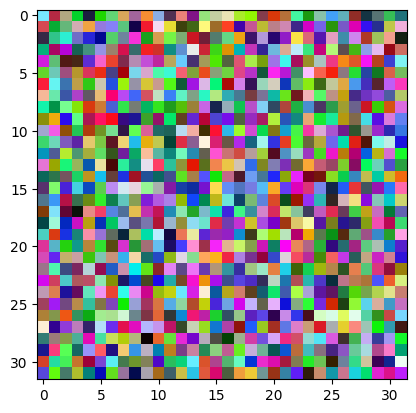

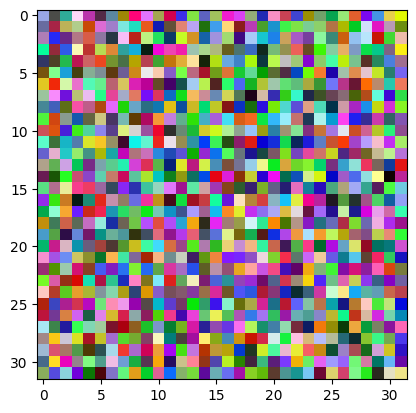

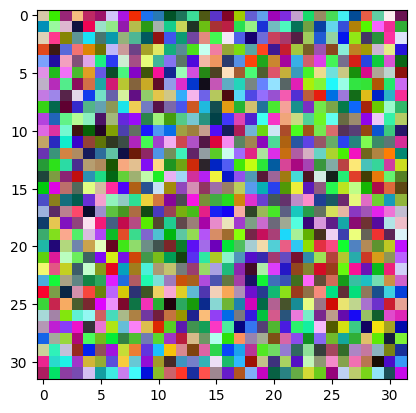

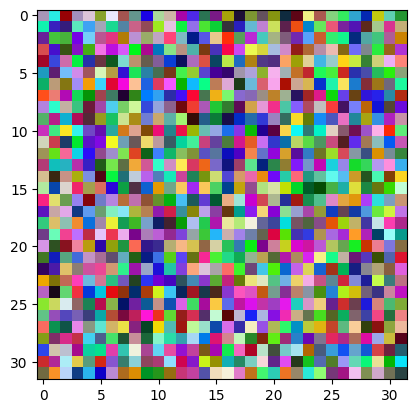

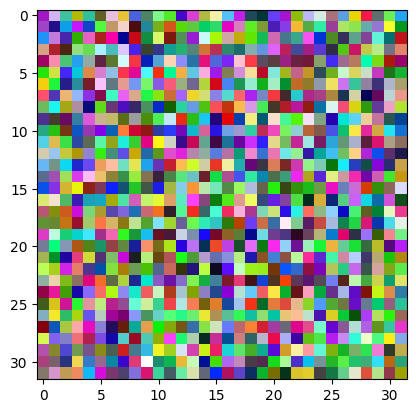

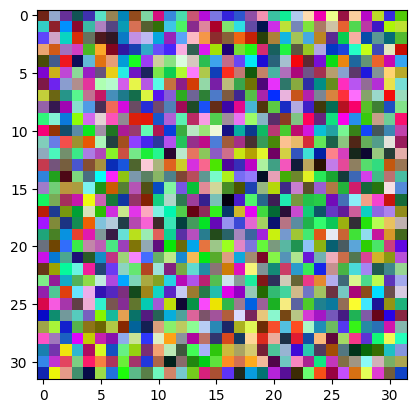

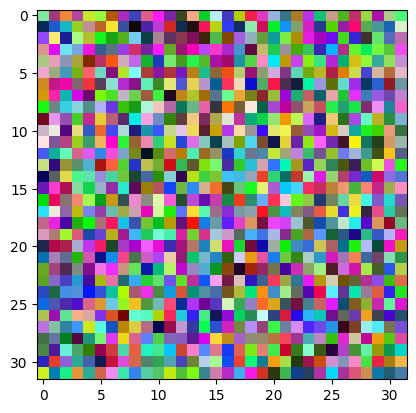

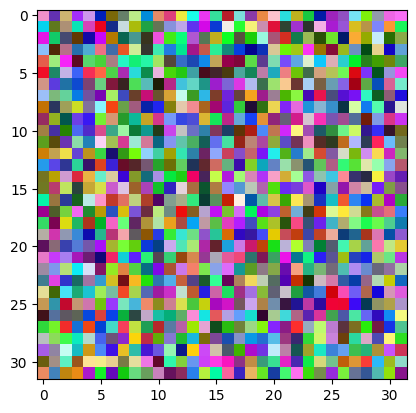

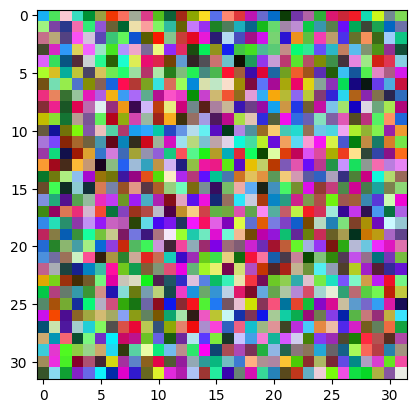

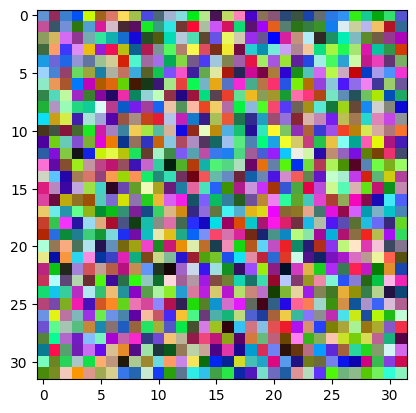

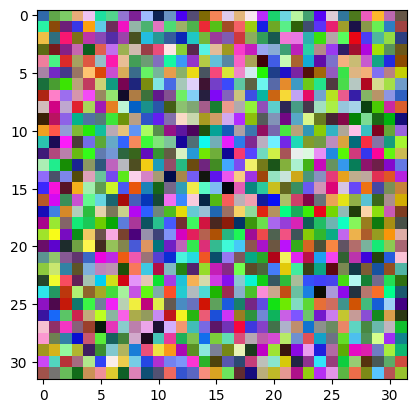

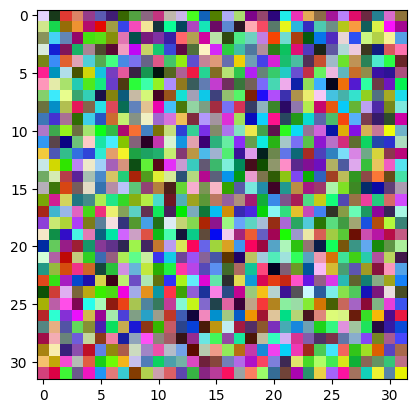

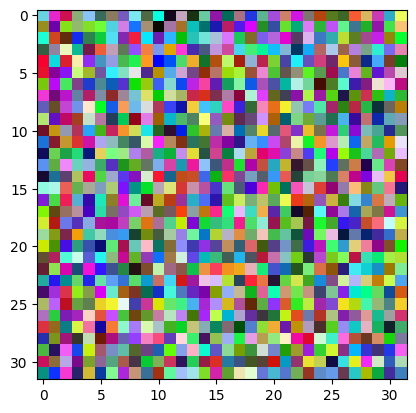

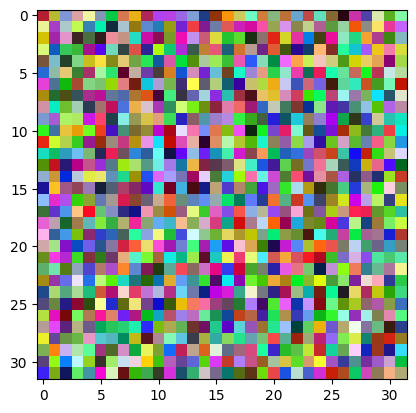

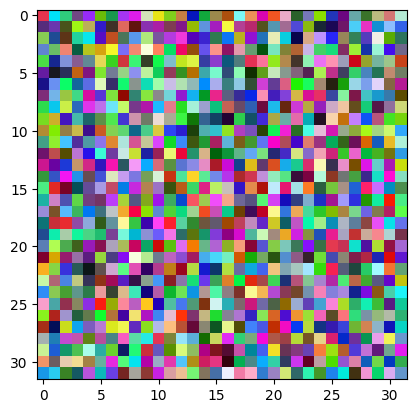

In [45]:
X = litmodel.sample(1,return_intermediate=True)

DICT = np.load('data/CIFAR10/CIFAR10_0.npz')
mean = DICT['train'].mean(axis=0)
std = DICT['train'].std(axis=0)

x = X[0][0].detach().numpy().transpose(1,2,0)
x = x*std + mean
x = np.ceil(x*255)
plt.imshow(x)

for x in reversed(X[1]):
    x = np.transpose(x[0].detach().numpy(), (1,2,0))
    x = x*std + mean
    x = np.ceil(x*255).astype(np.uint8)
    plt.imshow(x)
    plt.show()